1. Data Ingestion

2. EDA of the data

3. Processing of the data

4. Model Building

5. Model Evaluation

## Data Ingestion

1. Import the required libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc
2. Load the data
3. Load the time series data into a pandas dataframe
4. Set the datetime column as the index of the dataframe
5. Check the datatype of the index and convert it to datatime if necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
pd.read_csv('TSLA.CSV') # Tesla's stock data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0
...,...,...,...,...,...,...,...,...
753,2022-05-16,767.159973,769.760010,719.090027,724.369995,28699500,0,0.0
754,2022-05-17,747.359985,764.479980,728.849976,761.609985,26745400,0,0.0
755,2022-05-18,744.520020,760.500000,700.809998,709.809998,29270600,0,0.0
756,2022-05-19,707.000000,734.000000,694.109985,709.419983,30098900,0,0.0


In [3]:
# Univariant Analysis
data = pd.read_csv('TSLA.CSV')
stock_data = data[['Date', 'Close']]
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [9]:
stock_data['Date'] = pd.to_datetime(stock_data.Date)
stock_data

C:\Users\karth\AppData\Local\Temp\ipykernel_21420\3217578965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data.Date)


,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [13]:
stock_data = stock_data.set_index('Date')
stock_data

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


## why it's necessary to set Date column as the index

1. easy to retrive the data
2. visualization becomes simple
3. time series libraries are designed in such a manner, that they require time column as index (scipy statsmodel) 

## EDA of the data

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

In [15]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


'plt.plot()' draws a line graph where the x-axis typically represents time(or the index), and y-axis represents the corresponding data values.. if only single value is provided, then it is interpreted as y values

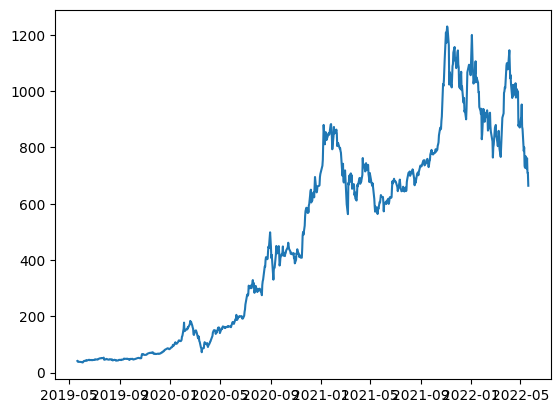

In [17]:
plt.plot(stock_data.Close)

plt.hist() is a function in the matplotlib.pyplot module used for creating histograms. A histogram is a graphical representation that organizes data into bins or intervals, showing the frequency distribution of a dataset.

## What the Function Does
- *Visualizes Distribution*: It groups data points into intervals (bins) and displays how many points fall into each interval.
- *Handles Numerical Data*: Typically used for continuous numerical data.
- *Customizable Appearance*: You can specify the number of bins, colors, alignment, and more.

---

## Syntax
plt.hist(x, bins, range, density, cumulative, **kwargs)


- x: Input data, usually an array-like or a single DataFrame column.
- bins: Number of bins or a sequence defining bin edges (default is 10 The range of the data is divided into equally spaced intervals(bins).
- range: Tuple specifying the range of the bins (default is the min and max of x).
- density: If True, the histogram is normalized to show probabilities instead of counts.
- cumulative: If True, computes a cumulative histogram.
- **kwargs: Additional keyword arguments (e.g., color, edgecolor, etc.).

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

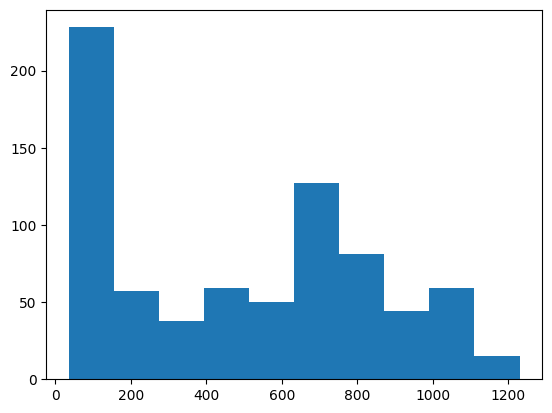

In [19]:
plt.hist(stock_data.Close)

C:\Users\karth\AppData\Local\Temp\ipykernel_21420\1231653583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)
C:\Users\karth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Close', ylabel='Density'>

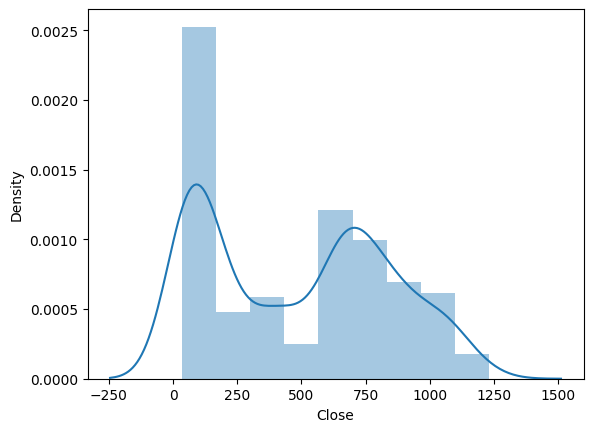

In [21]:
import seaborn as sns
sns.distplot(stock_data.Close)

distplot() is a function from the seaborn library, used to visualize the distribution of a dataset. It combines a histogram with a kernel density estimate (KDE) by default, providing insights into both the frequency distribution and the data's underlying probability density.

---

### **Key Features of distplot()**
- *Histogram*: Displays the frequency of data points in bins.
- *KDE*: Shows a smooth curve representing the probability density function (optional).
- *Rug Plot*: Marks individual data points on the x-axis (optional).

---

### *Syntax*
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, **kwargs)


- *a*: Input data (array-like or Series).
- *bins*: Number of bins or a sequence defining bin edges.
- *hist*: Whether to plot a histogram (True by default).
- *kde*: Whether to plot the KDE curve (True by default).
- *rug*: Whether to plot a rug plot (False by default).
- *kwargs*: Additional arguments to customize the plot.

---


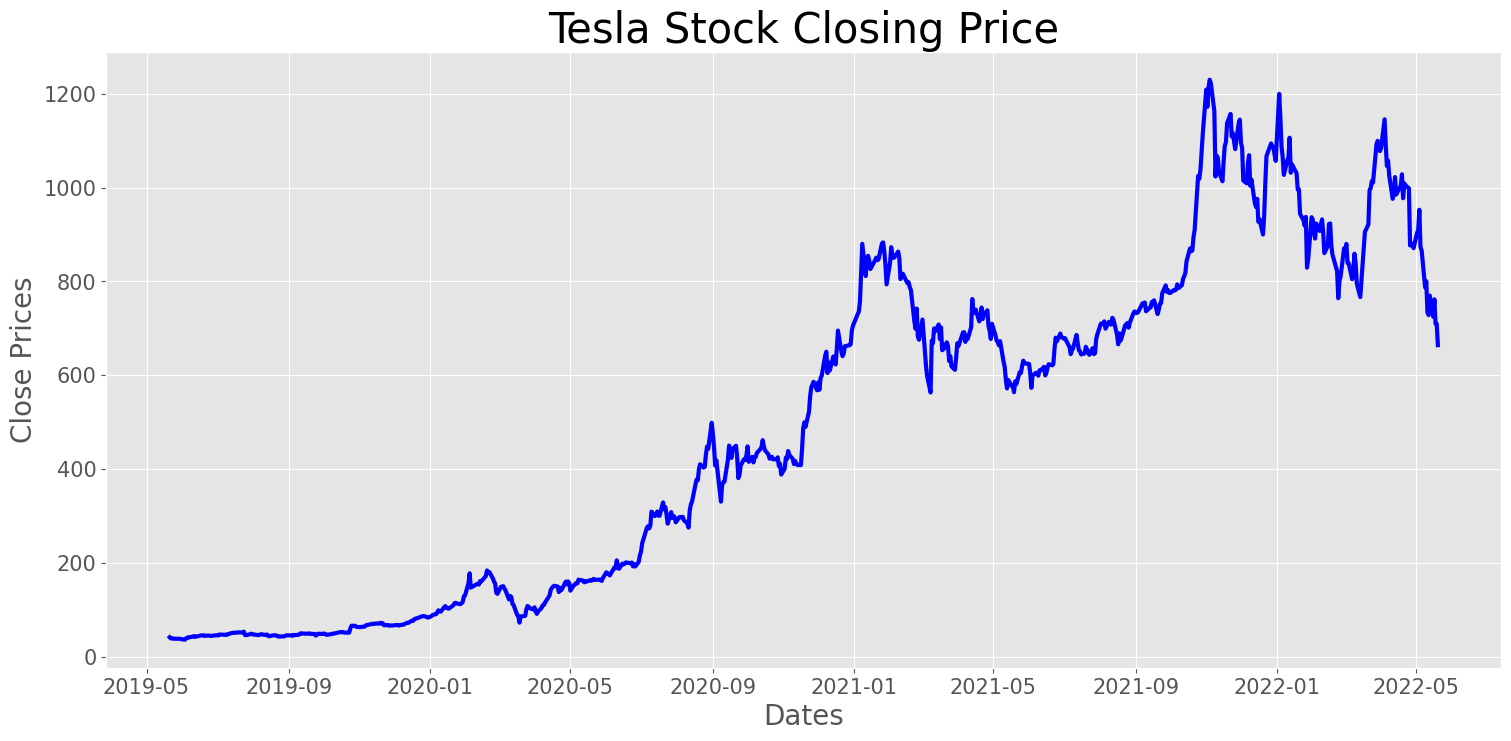

In [23]:
# Plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

---

#### 1. **plt.style.use('ggplot')**
- *What It Does*: Applies the 'ggplot' style to the plot, which mimics the aesthetics of the popular ggplot2 library in R.
- *Effect*: Adds a light gray grid in the background, softens colors, and adjusts font sizes for better visual appeal.
- *Why It's Used*: To make the plot look visually appealing with consistent formatting.

---

#### 2. **plt.figure(figsize=(18, 8))**
- *What It Does*: Creates a new figure with a specified size.
  - **figsize**: Tuple (width, height) in inches.
  - Here, the figure width is 18 inches and height is 8 inches.
- *Effect*: Defines the canvas size for the plot.
- *Why It's Used*: Larger dimensions make the plot easier to read, especially for detailed time-series data.

---

#### 3. **plt.grid(True)**
- *What It Does*: Enables grid lines on the plot.
  - *Parameter*: 
    - True: Turns the grid on.
- *Effect*: Adds a grid background that aligns with the tick marks.
- *Why It's Used*: Makes it easier to visually align data points with specific x and y values.

---

#### 4. **plt.xlabel('Dates', fontsize=20)**
- *What It Does*: Sets the label for the x-axis.
  - **'Dates'**: The text that appears as the label for the x-axis.
  - **fontsize=20**: Sets the font size of the label to 20 points.
- *Effect*: Adds "Dates" as a descriptive label to the x-axis, indicating the time scale.
- *Why It's Used*: Labels help viewers understand what the x-axis represents.

---

#### 5. **plt.xticks(fontsize=15)**
- *What It Does*: Adjusts the font size of tick labels on the x-axis.
  - **fontsize=15**: Sets the font size of tick labels to 15 points.
- *Effect*: Makes the tick labels readable without overwhelming the plot. (TICK LABELS are the text labels displayed along the axes of a plot.)
- *Why It's Used*: Larger or customized font sizes improve readability.

---

#### 6. **plt.ylabel('Close Prices', fontsize=20)**
- *What It Does*: Sets the label for the y-axis.
  - **'Close Prices'**: The text that appears as the label for the y-axis.
  - **fontsize=20**: Sets the font size of the label to 20 points.
- *Effect*: Adds "Close Prices" as a descriptive label to the y-axis, indicating stock closing prices.
- *Why It's Used*: To make the y-axis meaningful for the viewer.

---

#### 7. **plt.yticks(fontsize=15)**
- *What It Does*: Adjusts the font size of tick labels on the y-axis.
  - **fontsize=15**: Sets the font size of tick labels to 15 points.
- *Effect*: Makes the tick labels readable without overcrowding the plot.
- *Why It's Used*: To maintain consistency with the x-axis and improve clarity.

---

#### 8. **plt.plot(stock_data['Close'], linewidth=3, color='blue')**
- *What It Does*: Plots the "Close" prices from the stock_data DataFrame.
  - **stock_data['Close']**: The y-values to plot (Tesla's closing prices).
  - **linewidth=3**: Sets the thickness of the line to 3 points.
  - **color='blue'**: Colors the line blue.
- *Effect*: Draws a blue line plot that represents Tesla's closing prices over time.
- *Why It's Used*: Visualizes the trend in stock closing prices.

---

#### 9. **plt.title('Tesla Stock Closing Price', fontsize=30)**
- *What It Does*: Sets the title of the plot.
  - **'Tesla Stock Closing Price'**: Text displayed as the plot title.
  - **fontsize=30**: Sets the font size of the title to 30 points.
- *Effect*: Displays the title prominently at the top of the plot.
- *Why It's Used*: Titles provide context for what the plot represents.

---

#### 10. **plt.show()**
- *What It Does*: Displays the plot in the output window.
- *Effect*: Renders and outputs the entire figure to the screen or notebook.
- *Why It's Used*: Without plt.show(), the plot will not be visible in some environments (e.g., Jupyter Notebook, scripts).

---

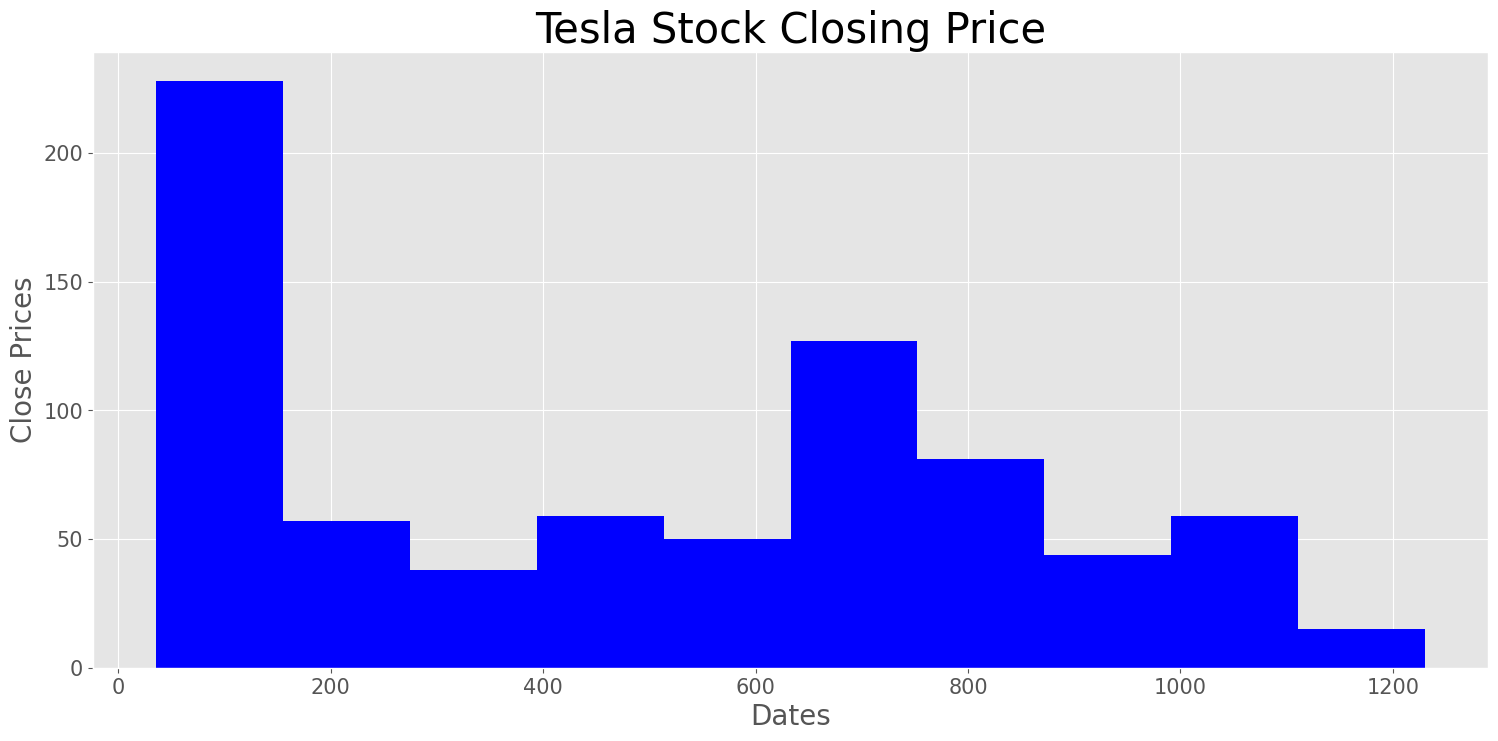

In [25]:
# Plotting close price

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Tesla Stock Closing Price', fontsize = 30)
plt.show()

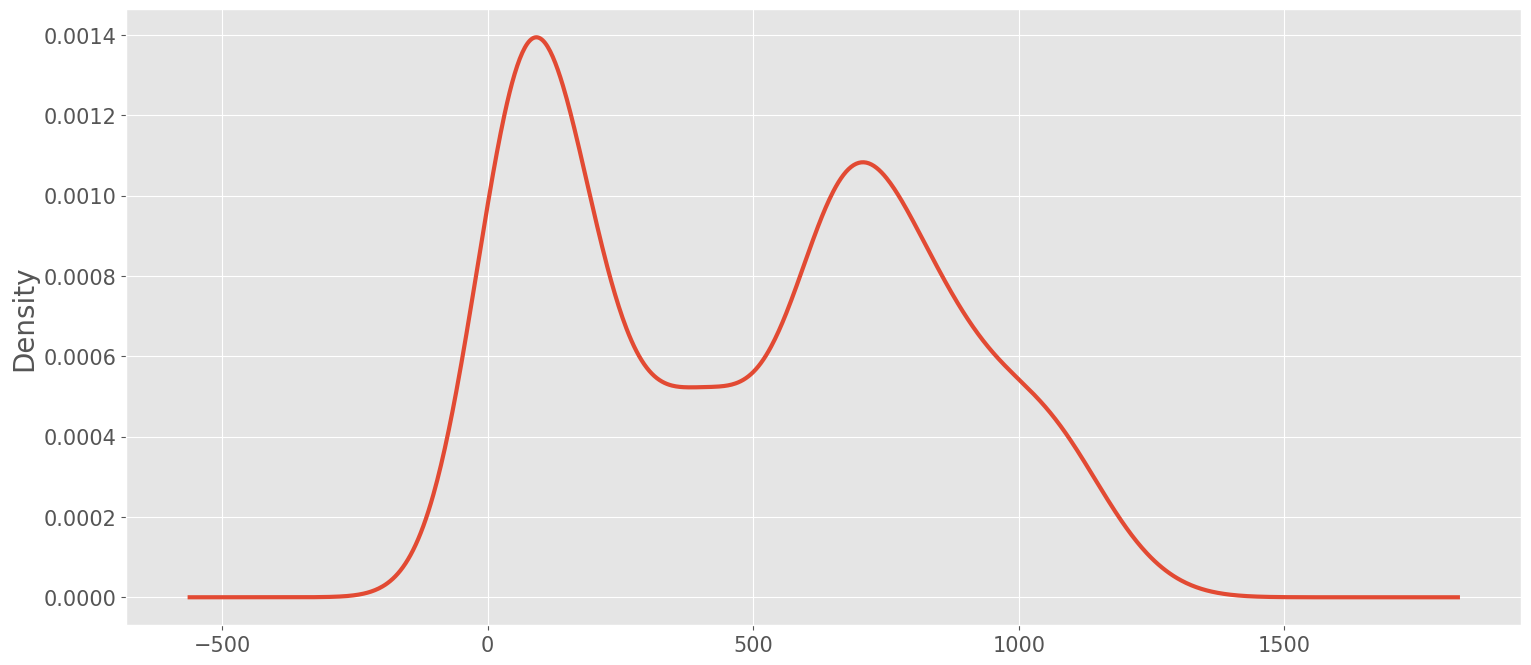

In [27]:
# Distribution of the close price

df_close = stock_data['Close']
df_close.plot(kind='kde', figsize = (18,8), linewidth= 3)
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

The rolling() function in Python is primarily used with *pandas* DataFrames and Series to perform rolling window calculations. It is commonly used in *time series analysis* or any dataset where sequential calculations are needed over a fixed-size sliding window.

---

### **What rolling() Does**
The rolling() function creates a rolling window (or moving window) over the data, which is a subset of consecutive values. It enables calculations like:
- Moving averages
- Rolling sums
- Rolling standard deviations
- Other custom aggregations within the window.

---

### *Syntax*
DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0)


### *Parameters*
- **window**: 
  - The size of the moving window (number of consecutive values to include in each calculation).
  - Example: window=3 will compute over every group of 3 values.

- **min_periods** (optional):
  - Minimum number of observations required in the window to perform a calculation.
  - Default is equal to window.

- **center** (optional):
  - If True, aligns the window at the center of the data points.
  - If False (default), aligns the window at the right edge.

- **win_type** (optional):
  - Specifies the type of weighting for the window (e.g., 'triang', 'hamming', 'bartlett').
  - If None, uses an equal weighting (simple rolling).

- **on** (optional):
  - Used for time series data to specify which column to use as the index.

- **axis** (optional):
  - Determines whether to calculate along rows (axis=0, default) or columns (axis=1).

---

In [29]:
rolmean = stock_data["Close"].rolling(48).mean()
rolstd = stock_data["Close"].rolling(48).std()

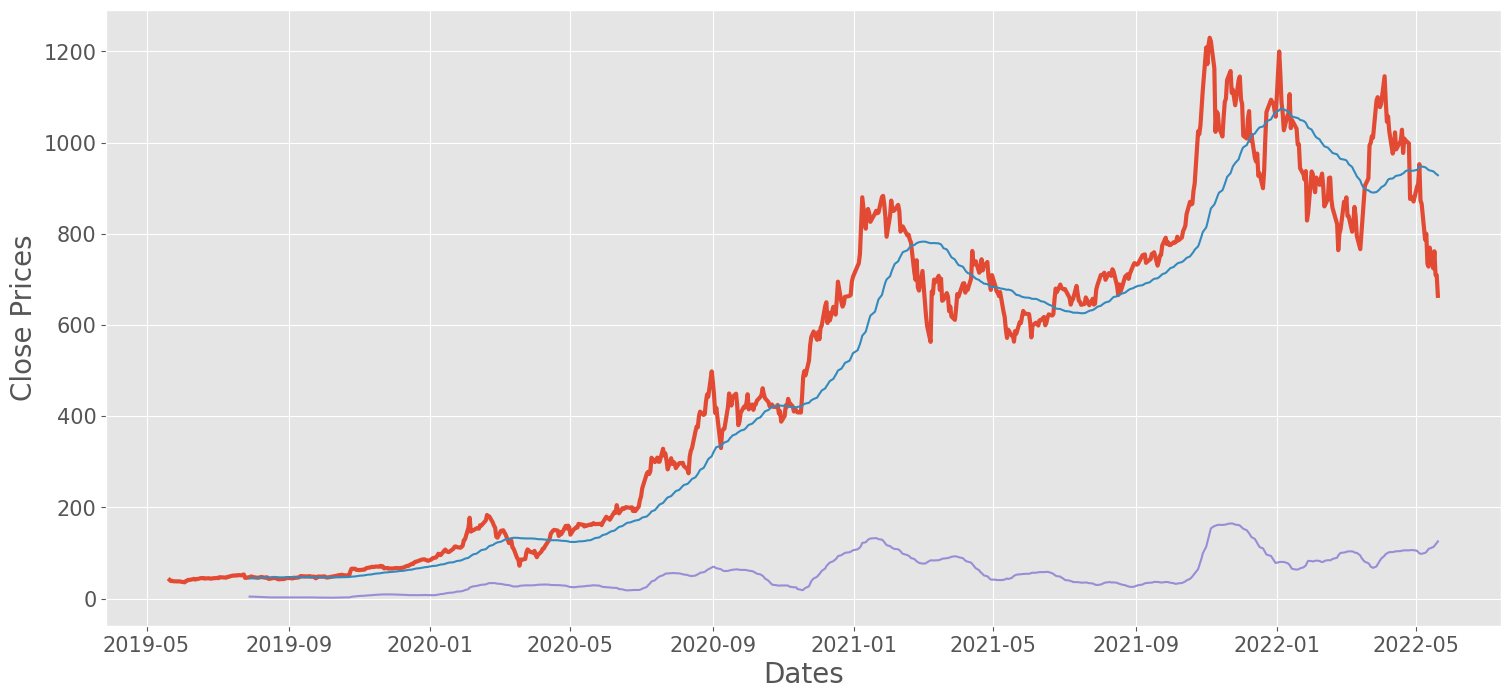

In [31]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.plot(stock_data.Close, linewidth = 3)
plt.plot(rolmean)
plt.plot(rolstd)

The adfuller() function in Python is used to perform the *Augmented Dickey-Fuller (ADF) test, which is a statistical test for checking the **stationarity* of a time series. Stationarity means that the statistical properties (like mean, variance, and autocorrelation) of the series do not change over time.

In time series analysis, stationarity is crucial because many forecasting models, such as ARIMA, assume the data to be stationary. The ADF test helps determine if the time series needs to be differenced (or transformed) to make it stationary.

### *Augmented Dickey-Fuller (ADF) Test*
- *Null Hypothesis (H₀): The time series has a unit root, meaning it is **non-stationary*.
- *Alternative Hypothesis (H₁): The time series does **not* have a unit root, meaning it is *stationary*.

### *Syntax*
from statsmodels.tsa.stattools import adfuller

adfuller(x, maxlag=None, regression='c', autolag='AIC')


### *Parameters*
- **x**: The time series data (either a pandas Series or NumPy array).
- **maxlag** (optional): The maximum number of lags to consider for the test. If None, the number of lags is determined automatically.
- **regression** (optional): The type of regression to use for the test.
  - 'c': Constant (default), tests if the series has a unit root (trend or no trend).
  - 'ct': Constant and trend, tests if there’s a unit root with a trend.
  - 'ctt': Constant, trend, and quadratic trend.
  - 'nc': No constant or trend.
- **autolag** (optional): The lag length selection method. It can be:
  - 'AIC': Akaike Information Criterion (default).
  - 'BIC': Bayesian Information Criterion.
  - 't-stat': Maximizes the t-statistic for the lag selection.
  - None: Use maxlag instead of selecting it automatically.

### *Return Values*
The adfuller() function returns several values:
1. *ADF Statistic*: The test statistic.
2. *p-value*: The probability of the null hypothesis being true (small values indicate stationarity).
3. *Number of Lags Used*: The number of lags that were used in the test.
4. *Number of Observations Used*: The number of observations used in the test.
5. *Critical Values*: The critical values for the test statistic at the 1%, 5%, and 10% significance levels.
6. *IC Best*: The best information criterion (if autolag is used).

### *Interpretation of Results*
- *ADF Statistic*: The more negative this value is, the stronger the evidence against the null hypothesis of non-stationarity.
- *p-value*:
  - If p-value < 0.05, you can reject the null hypothesis and conclude the time series is likely *stationary*.
  - If p-value >= 0.05, the time series is likely *non-stationary*.
- *Critical Values*: These values indicate the threshold for the test statistic at various significance levels (1%, 5%, and 10%).

---

### **When to Use adfuller()**
- Before building models like ARIMA, which require stationary data.
- To test if data needs transformation (e.g., differencing) to achieve stationarity.

In [122]:
# ADF
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data["Close"])
adft

(-1.3630085817037487,
 0.5998762543050697,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [35]:
pd.Series(adft[0:4], index=["test stats", "p-value", "lag", "data points"])

test stats      -1.363009
p-value          0.599876
lag              9.000000
data points    748.000000
dtype: float64

In [37]:
# Test for stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue', label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean', linewidth = 3)
    plt.plot(rolstd, color='black', label='Rolling Std', linewidth = 4)
    plt.legend(loc='best', fontsize=20, shadow=True, facecolor='lightpink', edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries, autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

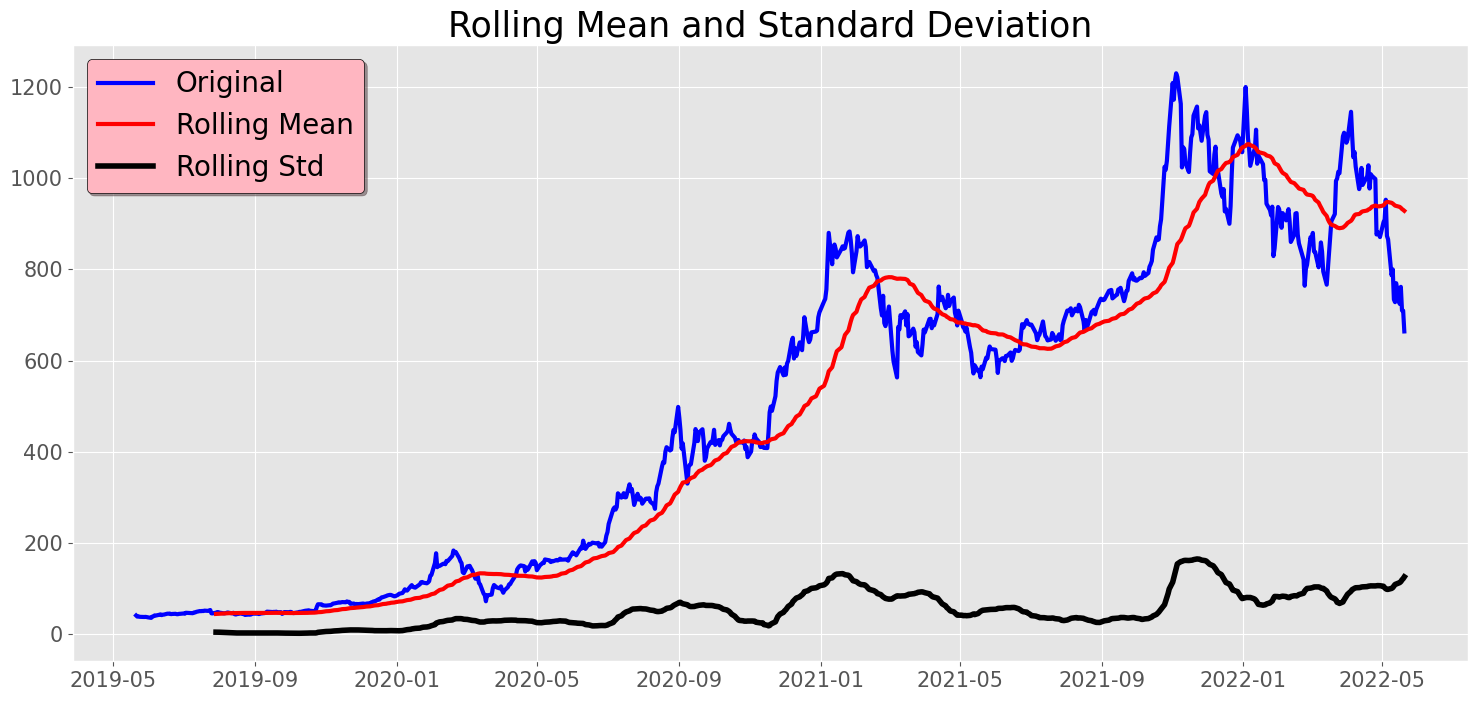

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [39]:
test_stationarity(stock_data.Close)

The **seasonal_decompose()** function in Python is used to decompose a time series into its *trend, **seasonality, and **residual* (noise) components. It is a part of the *statsmodels* library and is particularly useful for understanding the structure of a time series, especially when it exhibits periodic patterns or trends.

---

### **What Does seasonal_decompose() Do?**
The function breaks down a time series into the following components:
1. *Trend*: The long-term increase or decrease in the data.
2. *Seasonal*: The repeating patterns or cycles in the data (e.g., weekly, monthly, yearly).
3. *Residual*: The random noise or unexplained part of the data after removing trend and seasonality.

It supports two types of decomposition:
- *Additive Model*: When the components are additive:
  \[
  \text{Time Series} = \text{Trend} + \text{Seasonality} + \text{Residual}
  \]
- *Multiplicative Model*: When the components are multiplicative:
  \[
  \text{Time Series} = \text{Trend} \times \text{Seasonality} \times \text{Residual}
  \]

---

### *Syntax*
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(x, model='additive', period=None, extrapolate_trend=0)


### *Parameters*
1. **x**: 
   - The time series data (pandas Series or NumPy array). It should have a *datetime index* for accurate decomposition.
2. **model**: 
   - Specifies the type of decomposition: 'additive' (default) or 'multiplicative'.
3. **period**:
   - The number of observations per cycle (e.g., 12 for monthly data with yearly seasonality). 
   - If not provided, it must be inferred from the data index or set manually.
4. **extrapolate_trend** (optional):
   - Number of steps to extrapolate the trend at the ends. Default is 0 (no extrapolation).

---

### *Return Value*
The function returns a **DecomposeResult** object containing the decomposed components:
- **trend**: The long-term trend. The smoothed long-term progression in the data.
- **seasonal**: The seasonal component. The repeating cyclical pattern in the data.
- **resid**: The residual (noise) component. The difference between the observed data and the combination of trend and seasonality.
- **observed**: The original data.

---

### *When to Use Additive vs. Multiplicative Models*
- *Additive*: Use when the seasonal variation and residuals have a constant magnitude over time.
- *Multiplicative*: Use when the seasonal variation increases or decreases proportionally with the trend.

---

### *Advanced Features*
#### *Accessing Components*
You can access each component individually:
trend = result.trend
seasonal = result.seasonal
residual = result.resid


#### *Handle Missing Data*
If your time series has missing values, handle them before decomposition (e.g., with interpolation):
df['Sales'] = df['Sales'].interpolate()


#### *Extrapolating Trend*
If the trend component is truncated at the edges, you can extrapolate it:
result = seasonal_decompose(df['Sales'], model='additive', period=12, extrapolate_trend=2)


---

### *Applications in Time Series ML*
1. *Understanding Patterns*: Identifying seasonality and trends in data.
2. *Forecasting Models*: Removing trend and seasonality to focus on residuals.
3. *Feature Engineering*: Use trend, seasonal, or residual components as inputs for machine learning models.

In [41]:
# Time series decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]], period=12)
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

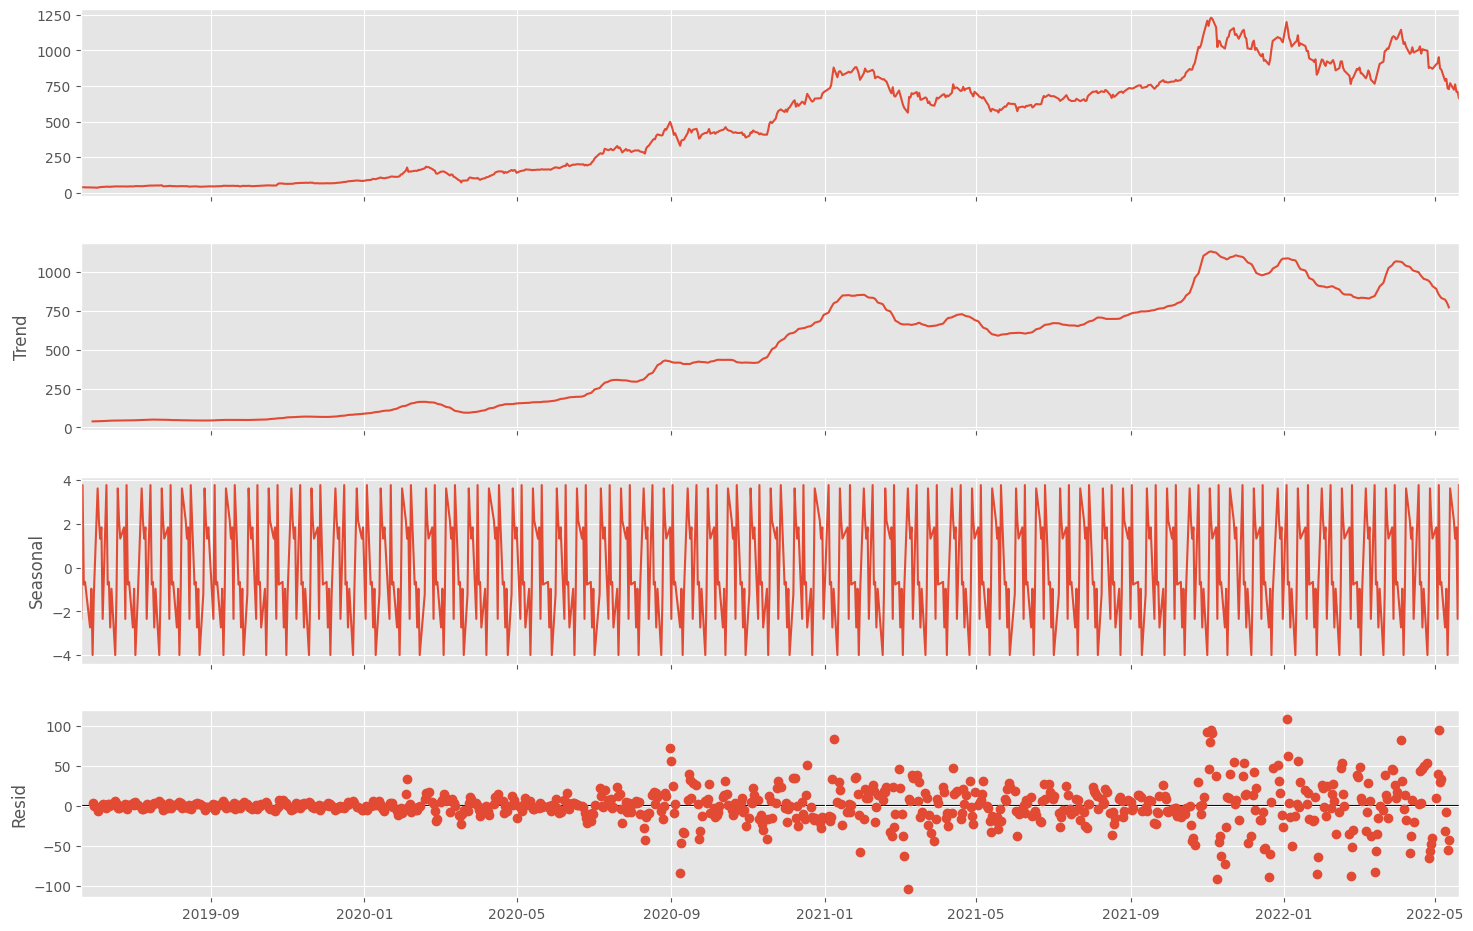

In [47]:
fig = plt.figure(figsize=(20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)

---

### 1. **fig = plt.figure(figsize=(20, 10))**
- *Purpose*: Creates a new figure object where you can add subplots or plots. 
- *Details*:
  - plt.figure() initializes a blank figure in Matplotlib.
  - The figsize=(20, 10) argument sets the dimensions of the figure in inches:
    - *20 inches wide*.
    - *10 inches tall*.
  - These dimensions determine the overall size of the figure canvas.

---

### 2. **fig = result.plot()**
- *Purpose*: Plots the decomposed components of the time series (trend, seasonal, residual, and observed).
- *Details*:
  - result is the output of seasonal_decompose(), which contains the decomposed components.
  - The result.plot() function generates a multi-panel plot:
    - *Observed*: Original time series.
    - *Trend*: Long-term trend.
    - *Seasonal*: Repeating cycles or patterns.
    - *Residual*: Random noise or irregularities.
  - The function automatically creates subplots for these components.
  - The return value of result.plot() is a *Matplotlib figure object*, which we store in the fig variable.

---

### 3. **fig.set_size_inches(17, 10)**
- *Purpose*: Adjusts the size of the figure canvas after it has been created.
- *Details*:
  - set_size_inches(width, height) changes the size of the figure object.
  - This method is applied to fig, which is the figure created by result.plot().
  - It modifies the size to *17 inches wide* and *10 inches tall*.
  - This allows you to adjust the figure's size dynamically if needed after plotting.

---

### *Why Are There Two Size Specifications?*
1. **figsize=(20, 10)**:
   - This sets the initial size of the blank figure when it's created.
2. **fig.set_size_inches(17, 10)**:
   - This changes the size of the final figure after the decomposition plots have been added.
   - It overrides the initial size set by figsize.

*Reason for using both*: Sometimes, the size of the figure returned by result.plot() may not match the initial size you set using plt.figure(). Calling set_size_inches ensures the final figure has the desired size.

---

### *How It All Works Together*
1. A blank figure of size 20x10 inches is created.
2. The decomposed components (observed, trend, seasonal, and residual) are plotted on this figure by result.plot().
3. The size of the final figure is adjusted to 17x10 inches to ensure it fits better in the output (e.g., for a Jupyter notebook or a presentation).

---

<Figure size 2000x1000 with 0 Axes>

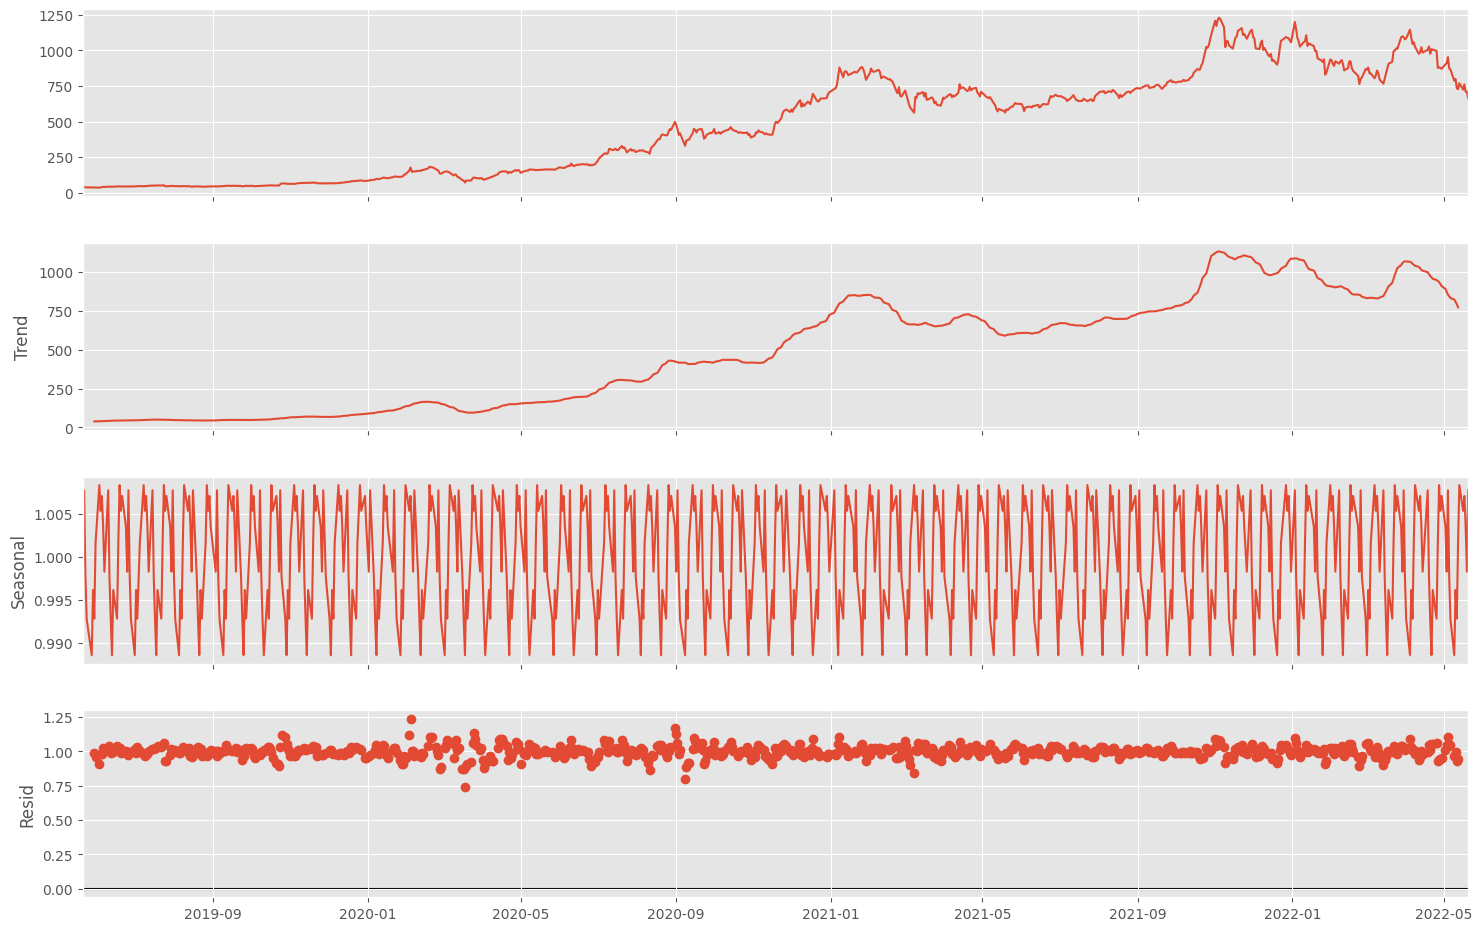

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[["Close"]], period=12, model="multiplicative")

fig = plt.figure(figsize=(20,10))
fig = result.plot()
fig.set_size_inches(17,10)

C:\Users\karth\anaconda3\Lib\site-packages\seaborn\categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


<Axes: >

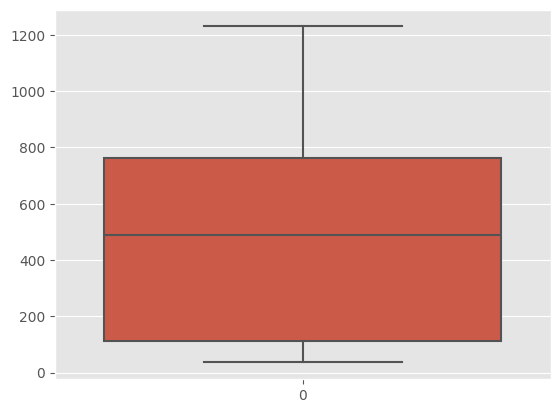

In [51]:
import seaborn as sns
sns.boxplot(stock_data.Close)

The **boxplot()** function in Python is used to create *box-and-whisker plots, which provide a graphical summary of the distribution of a dataset. A boxplot visually displays the **median, **quartiles, **outliers, and the **spread* of data, making it ideal for detecting variability, skewness, and outliers.

---

### *Purpose of Boxplot*
Boxplots summarize data using:
1. *Minimum (Lower Whisker)*: The smallest value within 1.5 times the interquartile range (IQR) from Q1.
2. *First Quartile (Q1)*: The 25th percentile (lower edge of the box).
3. *Median (Q2)*: The 50th percentile (the middle line inside the box).
4. *Third Quartile (Q3)*: The 75th percentile (upper edge of the box).
5. *Maximum (Upper Whisker)*: The largest value within 1.5 times the IQR from Q3.
6. *Outliers*: Data points outside the range defined by the whiskers.

---

### *Syntax*
#### In Matplotlib:
import matplotlib.pyplot as plt

plt.boxplot(data, notch=False, vert=True, patch_artist=False, labels=None)


#### In Pandas (for DataFrames):
df.boxplot(column=None, by=None, grid=True, figsize=None)


---

### *Parameters*
#### Matplotlib's plt.boxplot():
- **data**: The dataset to be plotted (list, NumPy array, or Pandas Series).
- **notch** (optional): If True, displays a notch to show the confidence interval around the median.
- **vert** (optional): If True, plots the boxplot vertically (default). If False, plots it horizontally.
- **patch_artist** (optional): If True, fills the boxes with color.
- **labels** (optional): Sets custom labels for each dataset.
- **showmeans** (optional): If True, shows the mean as a separate marker.

#### Pandas df.boxplot():
- **column**: Column(s) to plot.
- **by**: Grouping variable to create boxplots for different groups.
- **grid**: Whether to show a grid (default is True).
- **figsize**: Size of the figure.

---

### *How to Interpret a Boxplot*
1. *Median*: The thick line inside the box indicates the median value of the dataset.
2. *Box Edges (Q1 and Q3)*: The edges of the box represent the 25th percentile (Q1) and the 75th percentile (Q3).
3. *Whiskers*: The lines extending from the box indicate the range of data within 1.5 times the IQR from Q1 and Q3.
4. *Outliers*: Points outside the whiskers are plotted as individual markers (dots or circles) and are considered potential outliers.

---

### *Advanced Features*
1. *Add Mean to the Boxplot*
   plt.boxplot(data, showmeans=True, meanline=True)
   
   - showmeans=True: Displays the mean value as a separate marker (e.g., a green triangle).
   - meanline=True: Displays the mean value as a horizontal line inside the box.

2. *Customize Colors*
   box = plt.boxplot(data, patch_artist=True)
   for patch in box['boxes']:
       patch.set_facecolor('lightblue')
   

3. *Horizontal Boxplot*
   plt.boxplot(data, vert=False)
   

---

### *Applications of Boxplots*
1. *Outlier Detection*: Identifies extreme values in the data.
2. *Comparison*: Compares distributions across multiple datasets.
3. *Data Summary*: Provides a quick visual summary of central tendency and variability.

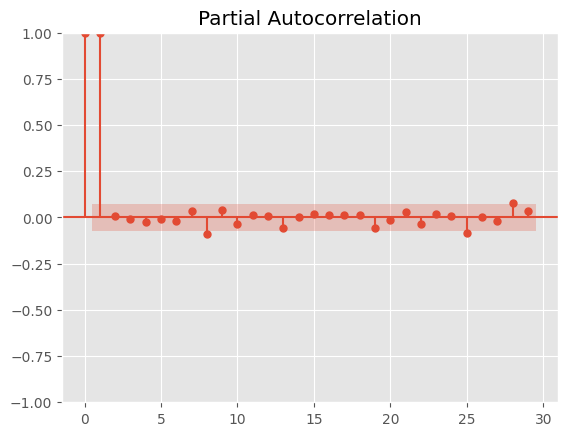

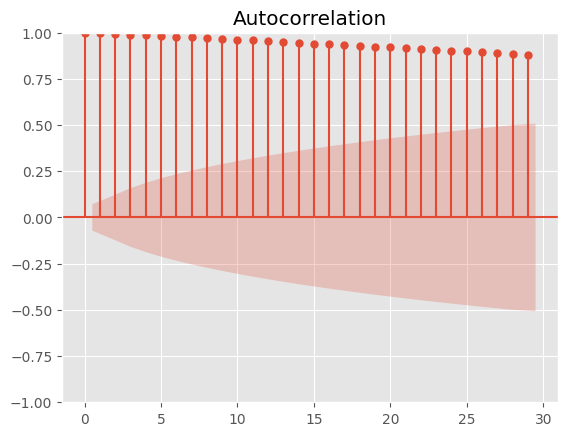

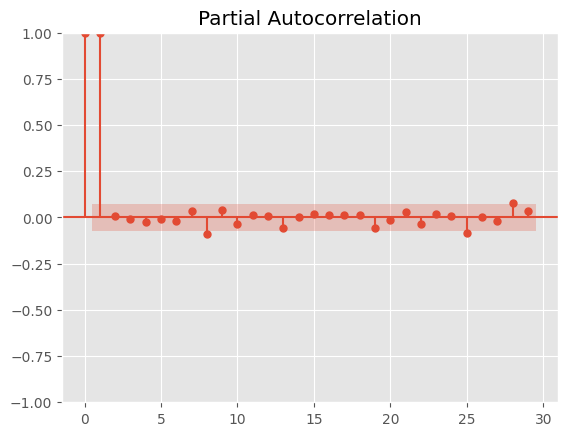

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

The plot_acf() and plot_pacf() functions from statsmodels.graphics.tsaplots are used to plot the *Autocorrelation Function (ACF)* and *Partial Autocorrelation Function (PACF)* of a time series. These plots are essential tools for analyzing time series data, especially when identifying the order of ARIMA or related models.

---

### *What Are ACF and PACF?*

#### 1. *Autocorrelation Function (ACF)*
- Measures the correlation between a time series and its lagged values over different lag intervals.
- Shows how much of the current value in a time series can be explained by its previous values.
- Helps determine the *MA (Moving Average)* order in ARIMA modeling.

#### 2. *Partial Autocorrelation Function (PACF)*
- Measures the correlation between a time series and its lagged values, *after removing the effects of intermediate lags*.
- Isolates the direct relationship between a time series value and its lag.
- Helps determine the *AR (Auto-Regressive)* order in ARIMA modeling.

---

### *Code Explanation*
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF
plot_acf(stock_data.Close)

# Plot the PACF
plot_pacf(stock_data.Close)


#### **1. plot_acf(stock_data.Close)**
- *Purpose*: Plots the autocorrelation function for the Close column of stock_data.
- *Input*: A time series (stock_data.Close), which is the closing price of a stock.
- *Output*: A bar plot showing autocorrelations for different lag values.

#### **2. plot_pacf(stock_data.Close)**
- *Purpose*: Plots the partial autocorrelation function for the Close column of stock_data.
- *Input*: Same time series data as the ACF plot.
- *Output*: A bar plot showing partial autocorrelations for different lag values.

---

### *Parameters*
Both functions accept several parameters to customize their behavior:
1. **x**: The time series data (e.g., stock_data.Close).
2. **lags**: The number of lags to include in the plot. Default is 40.
   - Example: plot_acf(stock_data.Close, lags=20)
3. **alpha**: The significance level for confidence intervals (default is 0.05).
   - Example: plot_acf(stock_data.Close, alpha=0.01)
4. **fft** (for plot_acf): If True, computes ACF using the Fast Fourier Transform for speed.
5. **title**: Title for the plot.
6. **zero** (for plot_acf): If False, excludes the correlation at lag 0 (self-correlation).
7. **method**: Method for PACF computation (e.g., Yule-Walker, OLS).

---

### *Output Analysis*
The ACF and PACF plots provide:
1. *Bars*: Represent the correlation coefficient at each lag.
2. *Confidence Intervals*: Shown as shaded or dashed horizontal bands around zero.
   - If a bar extends beyond the confidence interval, the correlation at that lag is statistically significant.
3. *X-Axis (Lag)*: Indicates the lag intervals (e.g., 1 day, 2 days, etc.).

---

### *Interpreting the Plots*
#### *ACF Plot*
- Use it to determine the presence of autocorrelation.
- Look for:
  - *Gradual Decline*: Indicates an AR process.
  - *Spike at a Lag*: Indicates an MA process.
  - *No Significant Correlation*: The series is likely white noise.

#### *PACF Plot*
- Use it to determine the direct effect of each lag.
- Look for:
  - *Single Significant Spike*: Indicates the order of an AR process.
  - *Gradual Decline*: Indicates an MA process.

---

### *Applications*
1. *Model Selection*:
   - Identify the order of AR and MA terms in ARIMA models.
   - ACF helps with *MA(q)* terms, while PACF helps with *AR(p)* terms.
2. *Stationarity Check*:
   - Non-stationary series often show a slow decay in ACF.
3. *Seasonality Detection*:
   - Peaks at regular intervals indicate seasonality.
4. *Residual Analysis*:
   - Use ACF and PACF to check for autocorrelation in model residuals.

## Preprocessing of the data

1. Fill missing values
2. Convert data into Stationary Time Series
3. IF necessary then normalize the data
4. Split the data into train, and test dataset
5. Clean the data by removing outliers

The **diff()** function in Python is used to compute the difference between successive elements in a data structure like a *Pandas DataFrame, **Series, or **NumPy array. It is commonly used in time series analysis to calculate **first differences*, which help stabilize non-stationary data by removing trends or seasonality.

---

### **Purpose of diff()**
1. *Calculate Differences*: Computes the difference between consecutive rows or columns in data.
2. *Stabilize Variance*: Helps transform non-stationary time series into stationary ones, which is essential for many machine learning models.
3. *Detect Change*: Useful for detecting changes in data, such as price fluctuations or rate of change.

---

### **Syntax for diff()**

#### *For Pandas Series or DataFrame*
Series.diff(periods=1)
DataFrame.diff(periods=1, axis=0)


- **periods** (default=1): The number of periods to shift for calculating the difference.
- **axis** (default=0): 
  - 0 means compute differences along rows (down the columns).
  - 1 means compute differences along columns (across the rows).

#### *For NumPy Arrays*
numpy.diff(a, n=1, axis=-1)


- **a**: Input array.
- **n** (default=1): The number of times differences are calculated.
- **axis** (default=-1): The axis along which to compute differences.

---

### *Real-World Applications*
1. *Stock Price Analysis*:
   - Compute daily or periodic price changes in financial data.
   python
   stock_data['Price_Change'] = stock_data['Close'].diff()
   

2. *Rate of Change*:
   - Calculate the change in sales, temperature, or other time-dependent variables.

3. *Time Series Differencing*:
   - Remove trends and make time series data stationary.
   python
   stationary_series = time_series.diff().dropna()
   

4. *Detect Anomalies*:
   - Identify large differences between consecutive observations.

---

### *Advanced Features*
#### *1. Differencing with Custom Periods*
python
# Compute the difference with a lag of 2 periods
data.diff(periods=2)


#### *2. Higher-Order Differences*
In NumPy, you can compute higher-order differences by setting the n parameter.
python
np.diff(arr, n=2)  # Second-order differences


#### *3. Column-Wise Differencing*
python
df.diff(axis=1)  # Compute differences across columns


---

### *Key Notes*
- Missing values (*NaN*) are introduced wherever the lag makes comparison impossible (e.g., the first row after diff()).
- In time series analysis, it's common to drop NaN values after differencing using .dropna().

In [55]:
# Non stationary to stationary
df_close = stock_data['Close']
df_close = df_close.diff()
df_close

Date
2019-05-21          NaN
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 758, dtype: float64

In [57]:
df_close = df_close.dropna()
df_close

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-05-16   -45.220032
2022-05-17    37.239990
2022-05-18   -51.799988
2022-05-19    -0.390015
2022-05-20   -45.519958
Name: Close, Length: 757, dtype: float64

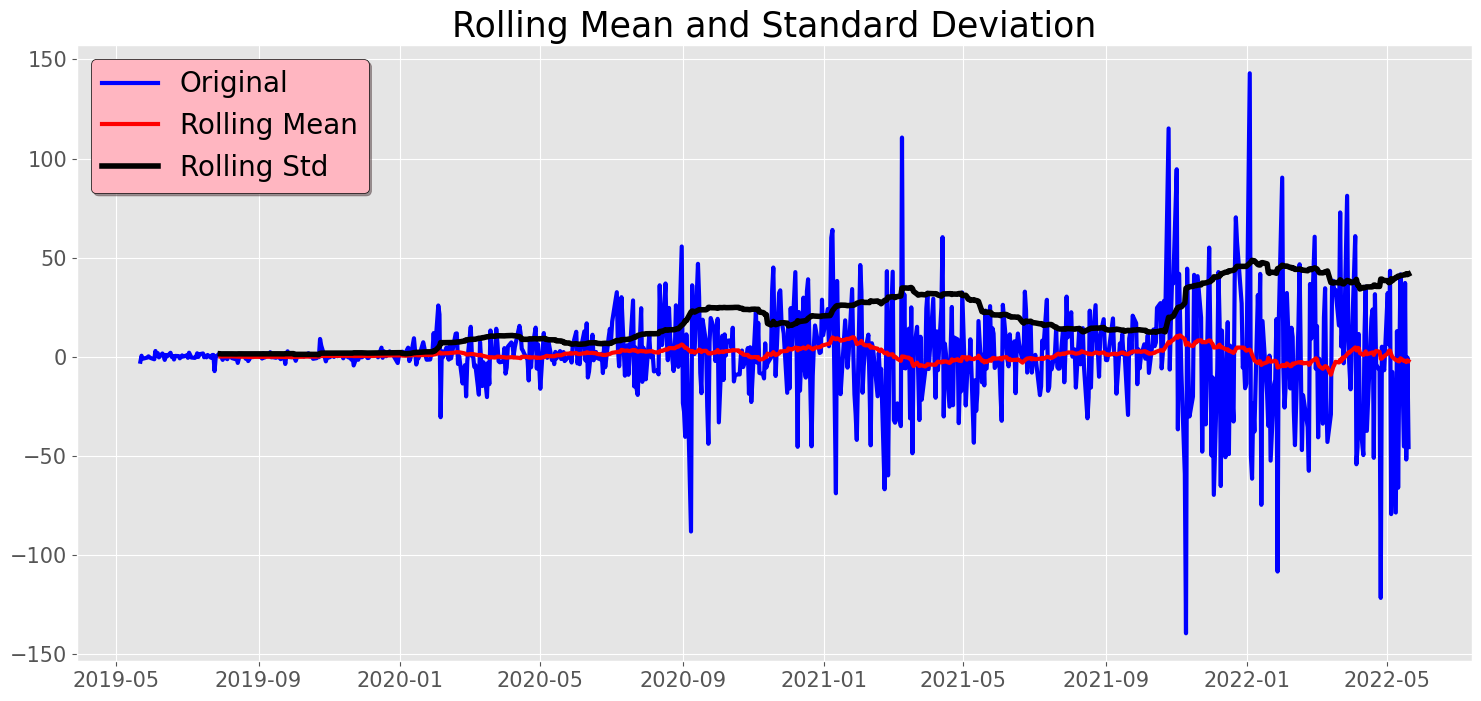

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [59]:
test_stationarity(df_close)

In [61]:
df_close[0:-60]

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [63]:
df_close[-60:]

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

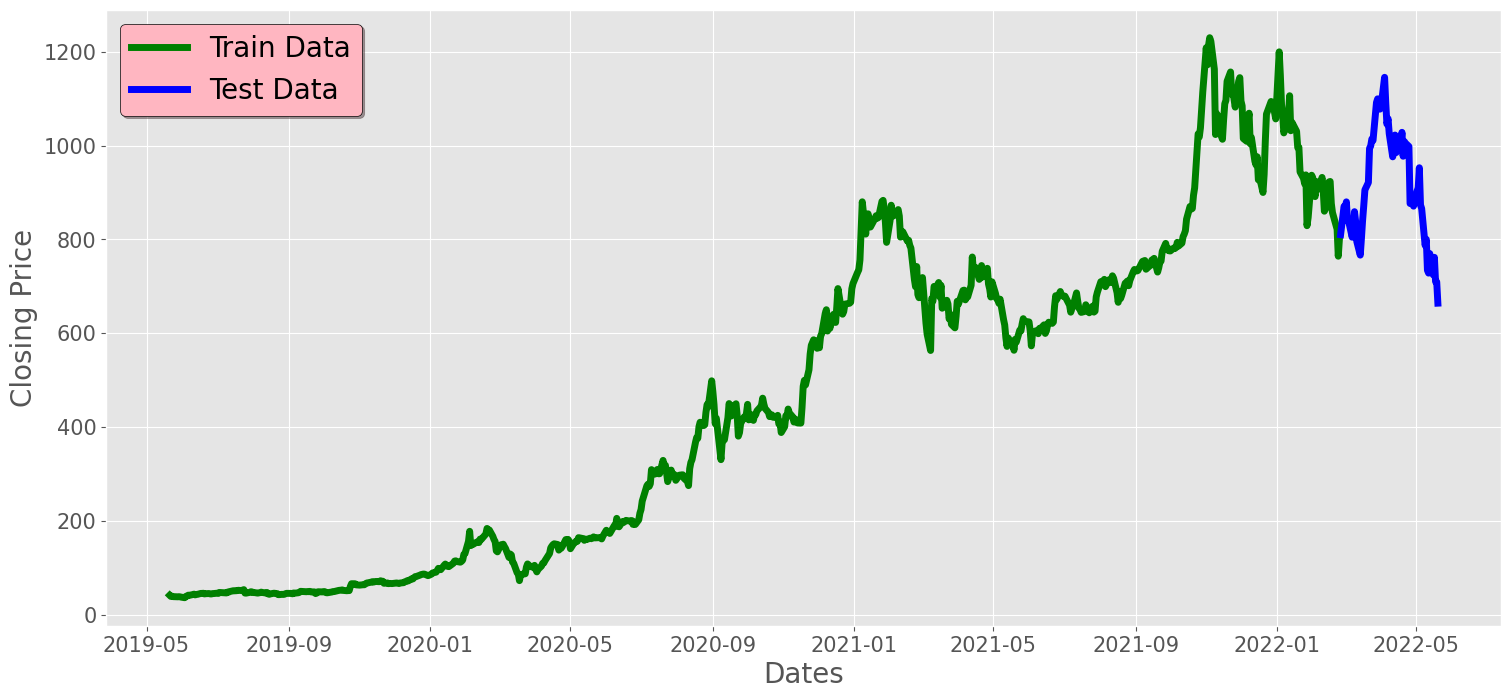

In [69]:
# Split the data into train and test sets
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data, 'green', label='Train Data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test Data', linewidth = 5)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

#### *1. Data Splitting*
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]

- **stock_data['Close']**:
  - Extracts the "Close" column from the stock_data DataFrame. This column represents the closing price of a stock over time.

- *Slicing the Data*:
  - **[0:-60]**: Selects all rows except the last 60 as the training data. 
    - 0 is the starting index.
    - -60 excludes the last 60 rows.
  - **[-60:]**: Selects only the last 60 rows as the testing data.
    - -60 is the starting index from the end of the data, and : includes all rows up to the last.

- *Purpose*: 
  - Training data is used to fit the model (learning patterns in the past data).
  - Testing data is used to evaluate the model's performance (predict future trends).

---

#### *2. Creating the Plot*
plt.figure(figsize=(18, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Closing Price', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

- **plt.figure(figsize=(18, 8))**:
  - Creates a new figure with a width of 18 inches and a height of 8 inches. This controls the plot's overall size.
  
- **plt.grid(True)**:
  - Adds a grid to the plot, improving readability by making it easier to align data points.

- **plt.xlabel('Dates', fontsize=20)**:
  - Adds a label to the X-axis and sets the font size to 20.
  
- **plt.ylabel('Closing Price', fontsize=20)**:
  - Adds a label to the Y-axis (representing stock prices) and sets the font size to 20.

- **plt.xticks(fontsize=15) and plt.yticks(fontsize=15)**:
  - Sets the font size for the tick labels on the X-axis (dates) and Y-axis (prices).

---

#### *3. Plotting the Data*
plt.plot(train_data, 'green', label='Train Data', linewidth=5)
plt.plot(test_data, 'blue', label='Test Data', linewidth=5)

- **plt.plot()**:
  - Plots the data on the figure.

- **train_data and test_data**:
  - The training data is plotted first, followed by the testing data.

- **'green' and 'blue'**:
  - Specify the colors of the lines:
    - Training data is shown in green.
    - Testing data is shown in blue.

- **label='Train Data' and label='Test Data'**:
  - Provide labels for the respective datasets. These labels will appear in the legend.

- **linewidth=5**:
  - Increases the thickness of the plotted lines for better visibility.

---

#### *4. Adding a Legend*
plt.legend(fontsize=20, shadow=True, facecolor='lightpink', edgecolor='k')

- **plt.legend()**:
  - Adds a legend to the plot to differentiate between the training and testing datasets.

- *Parameters*:
  - **fontsize=20**: Sets the font size of the legend text.
  - **shadow=True**: Adds a shadow effect to the legend box for better visual appeal.
  - **facecolor='lightpink'**: Sets the background color of the legend box to light pink.
  - **edgecolor='k'**:
    - Sets the edge color of the legend box to black ('k').

---

#### *5. Displaying the Plot*
plt.show()

- Displays the finalized plot with all the customizations.

---

In [71]:
stock_data['Close']

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [73]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [75]:
history = [x for x in train_data]
len(history)

698

In [77]:
model = ARIMA(history, order=(1, 1, 1)) # (p, d, q) = (1, 1, 1)

In [79]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Mon, 18 Nov 2024   AIC                           6306.700
Time:                        18:42:02   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model.forecast()

array([800.20438359])

In [83]:
mean_squared_error([test_data[0]], model.forecast())

C:\Users\karth\AppData\Local\Temp\ipykernel_21420\3255577619.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mean_squared_error([test_data[0]], model.forecast())


93.42404624178532

In [85]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

C:\Users\karth\AppData\Local\Temp\ipykernel_21420\1137669165.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.sqrt(mean_squared_error([test_data[0]], model.forecast()))


9.665611529633566

In [87]:
model.forecast()

array([800.20438359])

In [89]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i, j, k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [91]:
def train_arima_model(X, y, arima_order):
    # prepare training dataset
    # make predictions list
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [93]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = train_arima_model(dataset, test, order)
                    if rmse < best_score :
                        best_score, best_cfg = rmse, order
                    print('ARIMA = %s RMSE = %.3f' % (order, rmse))
                except:
                    continue
    print('BEST ARIMA = %s RMSE = %.3f' % (best_cfg, best_score))

---

### **1. Function: train_arima_model(X, y, arima_order)**

#### *Purpose*:
This function trains an ARIMA model on a given training dataset and evaluates its performance by predicting values for a test dataset. It computes the Root Mean Squared Error (RMSE) to assess prediction accuracy.

---

#### *Code Breakdown*

# prepare training dataset
history = [x for x in X]
predictions = list()

- **history**:
  - Initializes a list with the elements of X (the training dataset). 
  - This list is continuously updated during the loop with actual test values, simulating an expanding dataset.
  - *Purpose*: Keeps track of all available data for training at each step.
  
- **predictions**:
  - An empty list to store predictions for each time step in the test set.

---

for t in range(len(y)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()

- *Loop*:
  - Iterates over each time step t in the test dataset y.
  
- **ARIMA(history, order=arima_order)**:
  - Creates an ARIMA model object using the current history dataset and the specified arima_order (parameters (p, d, q)).
    - **p**: Autoregressive order (number of lagged observations).
    - **d**: Degree of differencing (to make the series stationary).
    - **q**: Moving average order (number of error terms to include).
  
- **model.fit()**:
  - Fits the ARIMA model to the history data.

---

yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[t])

- **model_fit.forecast()**:
  - Produces the next value in the time series based on the fitted ARIMA model.
  - The [0] index extracts the single forecast value from the array returned by forecast().
  
- **predictions.append(yhat)**:
  - Stores the forecasted value in the predictions list.
  
- **history.append(y[t])**:
  - Updates the history dataset with the actual value from the test dataset (y[t]) at the current time step.
  - *Purpose*: Expands the training data to include observed test values for the next iteration.

---

rmse = np.sqrt(mean_squared_error(y, predictions))
return rmse

- **mean_squared_error(y, predictions)**:
  - Calculates the Mean Squared Error (MSE) between the actual test values (y) and the predicted values (predictions).
  
- **np.sqrt()**:
  - Computes the square root of the MSE to get the RMSE.
  - *Purpose*: RMSE is a common metric for regression problems, measuring the average deviation of predictions from actual values.

---

### **2. Function: evaluate_models(dataset, test, p_values, d_values, q_values)**

#### *Purpose*:
This function evaluates multiple ARIMA models with different combinations of (p, d, q) parameters to find the best configuration based on RMSE.

---

#### *Code Breakdown*

dataset = dataset.astype('float32')
best_score, best_cfg = float('inf'), None

- **dataset.astype('float32')**:
  - Ensures the dataset is in a numerical format suitable for ARIMA modeling (float32 precision).

- **best_score, best_cfg**:
  - **best_score**: Initializes to infinity (float('inf')) to store the lowest RMSE encountered.
  - **best_cfg**: Initializes as None to store the best (p, d, q) configuration.

---

for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            try:
                rmse = train_arima_model(dataset, test, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA = %s RMSE = %.3f' % (order, rmse))
            except:
                continue

- *Nested Loops*:
  - Iterates over all combinations of p_values, d_values, and q_values to test different ARIMA configurations.

- **order = (p, d, q)**:
  - Specifies the ARIMA parameters for the current iteration.

- **try-except Block**:
  - *Purpose*: ARIMA fitting may fail for certain parameter combinations (e.g., if the dataset isn't stationary). The try block attempts to train the model, and the except block skips the failed configuration.

- **rmse = train_arima_model(dataset, test, order)**:
  - Calls train_arima_model to train the ARIMA model and compute RMSE for the current (p, d, q) configuration.

- **if rmse < best_score:**:
  - Updates best_score and best_cfg if the current RMSE is lower than the previously recorded best RMSE.

- **print('ARIMA = %s RMSE = %.3f' % (order, rmse))**:
  - Prints the current ARIMA configuration and its corresponding RMSE.

---

print('BEST ARIMA = %s RMSE = %.3f' % (best_cfg, best_score))

- After evaluating all parameter combinations, this line outputs the best ARIMA configuration and its RMSE.

---

### *Practical Applications*
- *Stock Price Forecasting*: Predicting future stock prices.
- *Demand Forecasting*: Estimating product demand.
- *Weather Predictions*: Modeling temperature or precipitation trends.
- *Economic Indicators*: Forecasting GDP, unemployment rates, etc.

In [95]:
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA = (0, 0, 0) RMSE = 457.414
ARIMA = (0, 0, 1) RMSE = 241.164
ARIMA = (0, 0, 2) RMSE = 156.109
ARIMA = (0, 1, 0) RMSE = 39.516
ARIMA = (0, 1, 1) RMSE = 39.482
ARIMA = (0, 1, 2) RMSE = 39.617
ARIMA = (0, 2, 0) RMSE = 57.835
ARIMA = (0, 2, 1) RMSE = 39.611
ARIMA = (0, 2, 2) RMSE = 39.580
ARIMA = (1, 0, 0) RMSE = 39.477
ARIMA = (1, 0, 1) RMSE = 39.449
ARIMA = (1, 0, 2) RMSE = 39.584
ARIMA = (1, 1, 0) RMSE = 39.475
ARIMA = (1, 1, 1) RMSE = 39.555
ARIMA = (1, 1, 2) RMSE = 39.935
ARIMA = (1, 2, 0) RMSE = 46.184
ARIMA = (1, 2, 1) RMSE = 39.573
ARIMA = (1, 2, 2) RMSE = 39.731
ARIMA = (2, 0, 0) RMSE = 39.440
ARIMA = (2, 0, 1) RMSE = 39.494
ARIMA = (2, 0, 2) RMSE = 39.598
ARIMA = (2, 1, 0) RMSE = 39.635
ARIMA = (2, 1, 1) RMSE = 39.759
ARIMA = (2, 1, 2) RMSE = 39.819
ARIMA = (2, 2, 0) RMSE = 45.781
ARIMA = (2, 2, 1) RMSE = 39.739
ARIMA = (2, 2, 2) RMSE = 39.732
BEST ARIMA = (2, 0, 0) RMSE = 39.440


In [97]:
history = [x for x in train_data]
predictions = list()
for i in range(len(test_data)) :
    model = ARIMA(history, order=(2, 0, 0))
    model = model.fit()
    fc = model.forecast(alpha=0.05) # fc = forecast
    predictions.append(fc)
    history.append(test_data[i])
print('RMSE: ', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE:  39.439913445339435


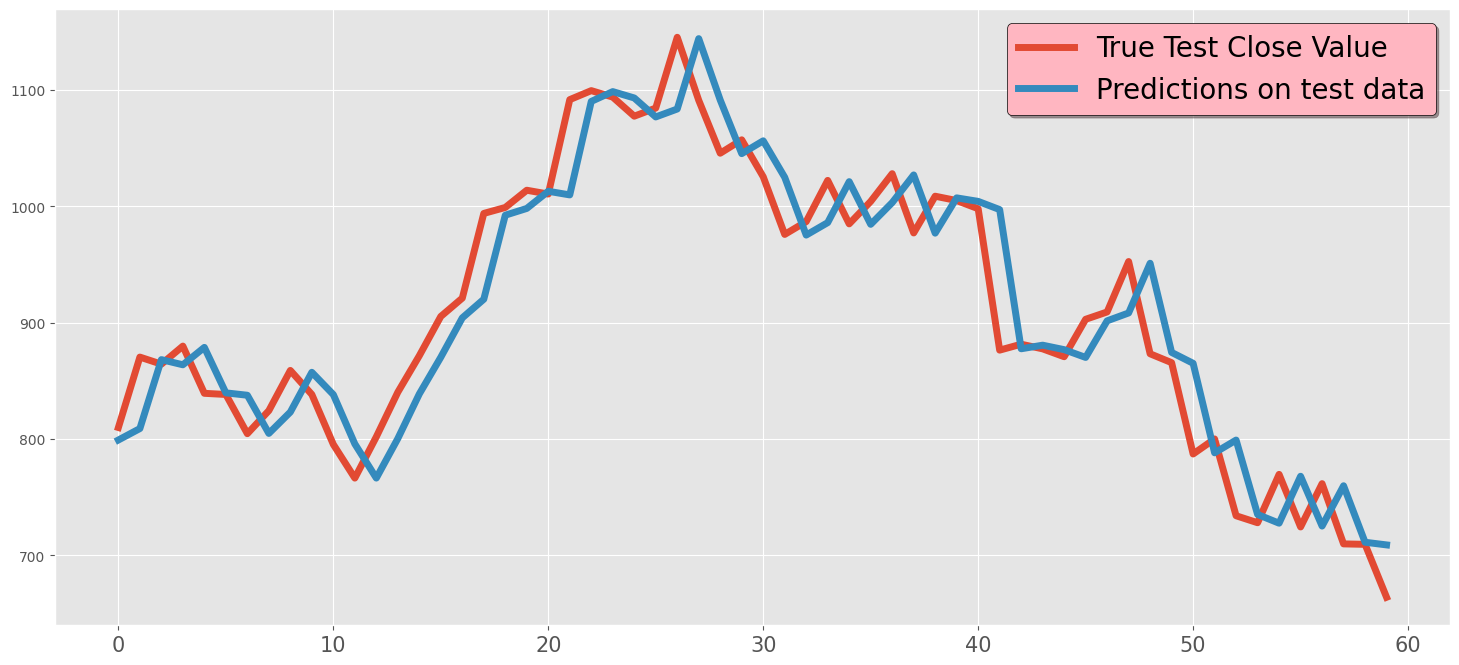

In [99]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True, facecolor='lightpink', edgecolor = 'k')
plt.show()

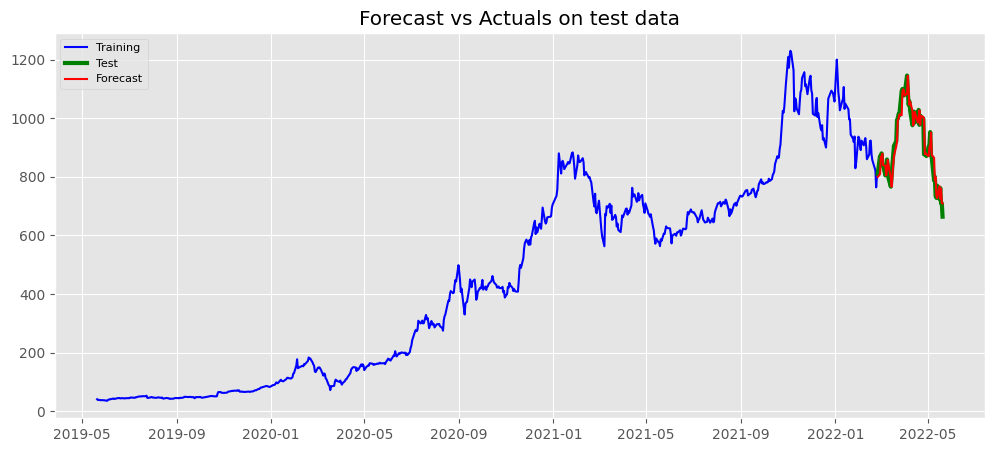

In [101]:
fc_series = pd.Series(predictions, index=test_data.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

### **pd.Series() in Pandas**

#### *Purpose*:
The pd.Series() function creates a one-dimensional labeled array capable of holding any data type (integer, float, string, etc.).

---

### *Syntax*:
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)


---

### *Parameters*:

| *Parameter* | *Description*                                                                                                                                      |
|---------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| data        | The data to populate the Series. Can be a list, NumPy array, dictionary, scalar, or another Series.                                                  |
| index       | Labels for the data. If not provided, integers starting at 0 are used as the index.                                                                  |
| dtype       | Data type for the Series elements. If not specified, Pandas infers the type automatically.                                                           |
| name        | Name for the Series. Useful for labeling when working with DataFrames.                                                                               |
| copy        | If True, makes a copy of the input data. By default, it is False.                                                                                |
| fastpath    | For internal use only (not typically used by end users).                                                                                             |

---

### **Properties of pd.Series**:
- *Immutable*: The values cannot be changed individually (though you can create a modified copy).
- *Heterogeneous*: Can hold data of different types, such as integers, floats, or strings.

---

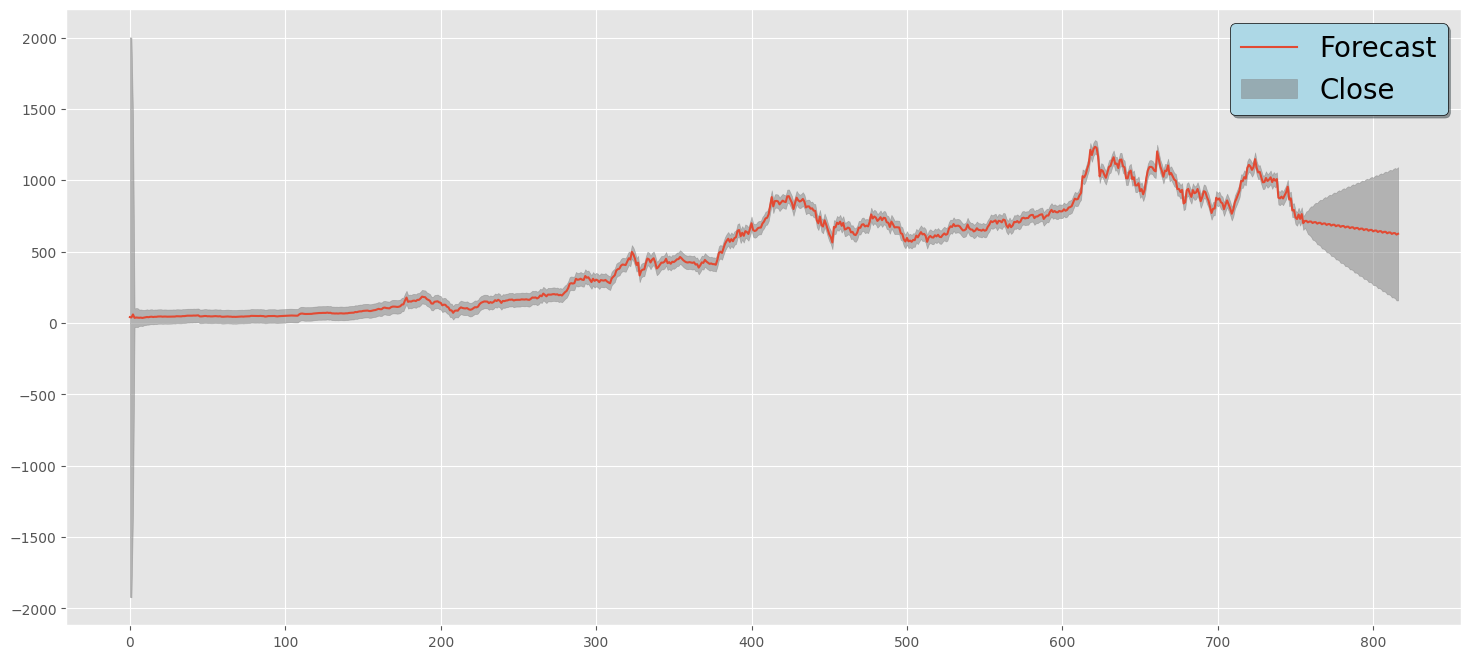

In [111]:
from statsmodels.graphics.tsaplots import plot_predict

fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit, start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast', 'Close', '95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

---

### **1. plot_predict()**

#### *Function*:
plot_predict is part of statsmodels.graphics.tsaplots. It visualizes the prediction or forecast of a time series model alongside the actual values. It plots predicted values for a specified range, including optional confidence intervals.

#### *Parameters*:
- **result**:
  - The fitted model (model_fit in your case). This should be an instance of a time series model, such as ARIMA.
  - *Purpose*: Uses the trained model to generate predictions.
  
- **start**:
  - The starting index of the forecast period.
  - In your case: start=1, meaning predictions begin near the start of the dataset.

- **end**:
  - The ending index for the prediction.
  - In your case: end=len(df_close)+60 forecasts for the entire dataset plus 60 additional time steps into the future.

- **ax**:
  - Specifies the Matplotlib axis object (ax1) to which the plot will be added.
  - *Purpose*: Ensures this plot integrates into the figure layout defined earlier.

#### *Output*:
- The plot includes:
  - *Actual values*: Plots the observed data.
  - *Forecasted values*: Plots predictions from the model.
  - *Confidence intervals*: Displays upper and lower confidence bounds around predictions (typically 95%).

---

### **2. fig.add_subplot(111)**

#### *Function*:
fig.add_subplot() creates and adds a subplot to the figure. The argument 111 specifies the layout of the subplot grid.

#### *Details*:
- *Argument Breakdown*:
  - 1: Number of rows in the subplot grid.
  - 1: Number of columns in the subplot grid.
  - 1: Index of the current subplot in the grid.
  - *Purpose*: In this case, it creates a single subplot that spans the entire figure.

- *Result*:
  - Returns an AxesSubplot object (ax1) that can be customized further (e.g., passing to plot_predict()).

---

### **3. plt.grid("both")**

#### *Function*:
Controls the grid lines on the plot for better readability.

#### *Details*:
- "both":
  - Adds grid lines for both *major* and *minor* ticks along the x and y axes.

---

### **4. plt.legend()**

#### *Additional Details*:
- **facecolor='lightblue'**:
  - Sets the background color of the legend box to lightblue.

---

In [105]:
# evaluate parameters

import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.73948211350696


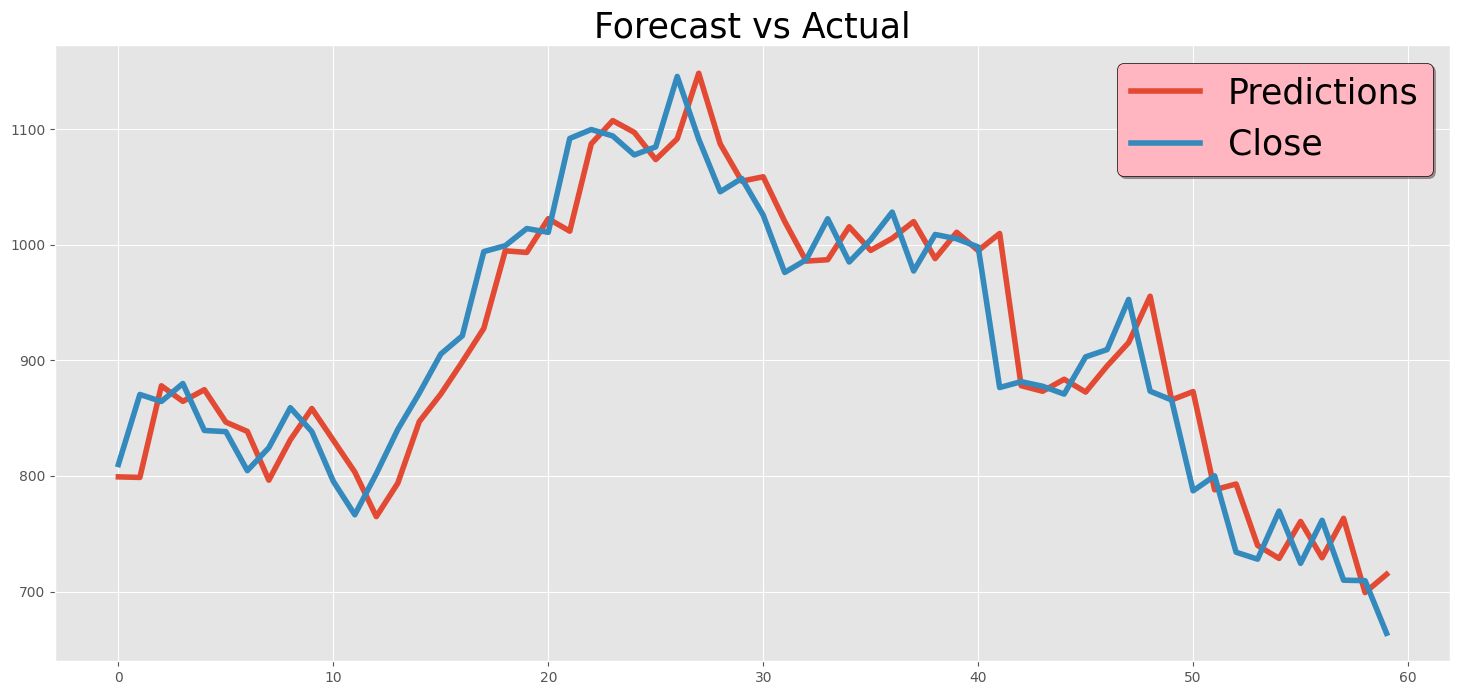

In [107]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')

---

### **1. warnings.filterwarnings('ignore')**
- *Purpose*: 
  - Suppresses warning messages generated during the execution of the code.
  - In this case, it prevents verbose outputs from the SARIMAX model, such as convergence warnings, which are common but not necessarily indicative of errors.
- *Why?*
  - Simplifies the output by hiding warnings that don't require immediate action.

---

### **2. history = [x for x in train_data]**
- *Purpose*:
  - Creates a copy of the train_data values, storing them in a list called history.
- *Why a List?*
  - The list is updated dynamically during each iteration of the loop (history.append(test_data[t])), making it suitable for expanding the training dataset with new observed values from test_data.

---

### **3. model = sm.tsa.statespace.SARIMAX()**

#### *What is SARIMAX?*
- *SARIMAX*: Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors.
  - A more advanced version of ARIMA that accounts for *seasonal patterns* and allows for *external predictors (exogenous variables)*.

#### *Parameters Used*:
- **history**:
  - The input time series data (dynamically updated with both train and test values as the loop progresses).
- **order=(0,1,0)**:
  - Specifies the *non-seasonal ARIMA components*:
    - p=0: No autoregressive terms.
    - d=1: First differencing to achieve stationarity.
    - q=0: No moving average terms.
- **seasonal_order=(1,1,1,3)**:
  - Specifies the *seasonal ARIMA components*:
    - P=1: One seasonal autoregressive term.
    - D=1: Seasonal differencing applied once.
    - Q=1: One seasonal moving average term.
    - m=3: Seasonal period length (e.g., quarterly data for m=3).

---

### **4. model_fit = model.fit()**
- *Purpose*:
  - Fits the SARIMAX model to the data in history.
- *What Happens?*
  - The model estimates parameters for the specified order and seasonal_order.
  - It uses maximum likelihood estimation (MLE) to find the best-fit values for the coefficients.

---

### **5. fc = model_fit.forecast()**
- *Purpose*:
  - Generates the *next predicted value* for the time series based on the fitted model.
- *Result*:
  - A single forecasted value (fc) is appended to the predictions list.
  - This value represents the SARIMAX model's best estimate of the next time step.

---

### **6. history.append(test_data[t])**
- *Purpose*:
  - Adds the *observed value* from test_data to history, expanding the dataset for subsequent iterations.
- *Why?*
  - Ensures that the model is updated with real observations, simulating a rolling forecast.

---

### **7. np.sqrt(mean_squared_error(test_data, predictions))**
- *Purpose*:
  - Computes the *Root Mean Squared Error (RMSE)* between the predicted (predictions) and actual (test_data) values.
- *RMSE Formula*:
  \[
  RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
  \]
  - Where:
    - \( y_i \): Actual value from test_data.
    - \( \hat{y}_i \): Predicted value from predictions.

---

### *Key Flow*:
1. *Initialize*:
   - history: Starts with train_data.
   - predictions: Empty list to store forecasted values.

2. *Iterative Forecasting*:
   - For each time step in test_data:
     - Train the SARIMAX model on the current history.
     - Forecast the next value and append it to predictions.
     - Add the actual observed value to history for future model updates.

3. *Evaluate Model*:
   - Calculate RMSE to assess the accuracy of the SARIMAX model's predictions.

---

### *Output*:
- RMSE: The model's overall performance metric. Lower RMSE values indicate better predictions.